# Part 1 - Chapter 1

<div dir="rtl">
متن RTL</div>

In [1]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 850.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# The simplest neural networks

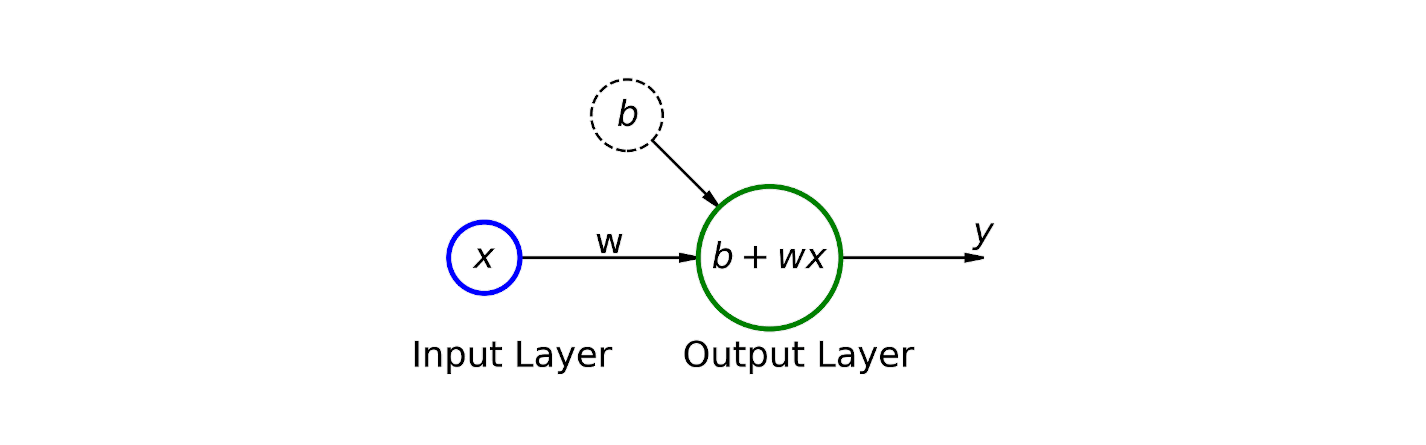

## Data Generation

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[train_idx]

# Gradient Descent
## Step 0 - Random Initialization

In [5]:
# Step 0 - Initialization parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1 - Compute Model's Predictions

In [6]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

## Step 2 - Compute the Loss

In [7]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


## Step 3 - Compute the Gradients

In [8]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


## Step 4 - Update the Parameters

In [9]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


## Step 5 -Rinse and Repeat

# with Numpy

In [10]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
# Step 1 - Computes model's predicted output - forward pass
  yhat = b + w * x_train
  error = (yhat - y_train)
  loss = (error ** 2).mean()
  b_grad = 2 * error.mean()
  w_grad = 2 * (x_train * error).mean()
  b = b - lr * b_grad
  w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


# PyTorch

### Tensors

In [11]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[-1.2105, -0.8180, -0.7553,  1.1376],
         [ 0.0564, -0.1521,  0.6604, -0.7279],
         [ 2.5033,  0.0074,  0.5289, -1.1087]],

        [[-0.5015,  1.2982,  0.3229, -0.8225],
         [-0.0496,  0.6767, -1.3998, -0.5190],
         [ 0.1497, -0.8434, -0.1457, -0.5353]]])


In [12]:
print(tensor.size(), tensor.size())

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


### Loading Data, Devices, and CUDA

In [13]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

<div dir="rtl">
<h1>تنسور CPU</h1>
هر تنسوری که تاکنون ایجاد شده است، CPU tensor بوده است. چرا که در حافظه اصلی کامپیوتر ذخیره می‌گردد و توسط CPU این داده‌ها هندل می‌شوند. تکنیکالی به داده‌ای که در حافظۀ اصلی باشد، به این نوع از تنسور CPU tensor اطلاق می‌گردد.
</div>

<div dir="rtl">
<h1>تنسور GPU</h1>
تنسور GPU به تنسورهایی اطلاق می‌گردد که در حافظۀ کارت گرافیک ذخیره گردند.

می‌توان با استفاده از کد PyTorch تشخیص داد که آیا GPU فعال است یا نه.
</div>

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [15]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

Tesla T4


In [16]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

In [17]:
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [20]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


<div dir="rtl">
<h1>تنسورهای پارامترهای قابل یادگیری</h1>
تنسور پارامترهای قابل یادگیری نیاز به gradient دارند. در واقع این فرق بین این نوع از تنسورها و تنسور داده‌ها است.</div>

**CPU tensors for parameters**:

In [22]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b , w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


**GPU tensors for parameters:**

In [25]:
torch.manual_seed(42)

b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)

b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], device='cuda:0', requires_grad=True) tensor([0.1288], device='cuda:0', requires_grad=True)


**OR**:

In [26]:
torch.manual_seed(42)

b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
